In [1]:
# link_data 
https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification
    

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


### We have a dataset that contains tweets from people from different countries at the time of the Covid-19 crisis, classified into several categories, such as negative, positive, and neutral. We will analyze and then train a model to make predictions.

###  السلام عليكم لدينا مجموعة بيانات تحتوي علي تغريدات لاشخاص من دول مختلفة في وقت ازمة كوفيد19 مصنفعة لعدة تصنيفات مثل سلبي وايجابي ومحايد سنوم بتحليل ثم تدريب نموذج علي  التنبأ 

In [36]:
# استردراد المكتبات الضرورية 
#import  necessary libraries
# استيراد مكتبة باندا
import pandas as pd
# Importing the pandas library
# استيراد مكتبة نمباي
import numpy as np
# Importing the numpy library
# استيراد وظيفة word_tokenize من مكتبة NLTK
from nltk import word_tokenize
# Importing the word_tokenize function from the NLTK library
# استيراد مكتبة stopwords من مكتبة NLTK
from nltk.corpus import stopwords
# Importing the stopwords library from the NLTK library
# استيراد مكتبة spacy
import spacy 
# Importing the spacy library
# تحميل موديل اللغة الإنجليزية من مكتبة spacy
nlp = spacy.load("en_core_web_sm") 
# Loading the English language model from the spacy library
# تجاهل الإنذارات
import warnings
warnings.filterwarnings('ignore')
# Ignoring warnings
# استيراد مكتبة re
import re
# Importing the re library
# استيراد مكتبة string
import string
# Importing the string library
import nltk
# تنزيل قائمة الكلمات الوقفية من مكتبة NLTK

# Downloading the list of stopwords from the NLTK library
from nltk.stem import PorterStemmer, WordNetLemmatizer
from textblob import TextBlob
from nltk.corpus import stopwords          
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')
nltk.download('wordnet')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#في العربية: هذه المكتبة توفر وظيفة لتقسيم البيانات إلى مجموعات التدريب والاختبار
# This library provides a function for splitting the data into training and testing sets.
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Flatten,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# قراءة مجموعة البيانات الاختبارية من المسار المحدد
# Reading the test dataset from the specified path
df = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv')

# قراءة مجموعة البيانات التدريبية من المسار المحدد مع ترميز 'ISO-8859-1'
# Reading the train dataset from the specified path with 'ISO-8859-1' encoding
df1 = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding='ISO-8859-1')

# عرض إطار البيانات
# Displaying the DataFrame
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


### We analyze and explore data In this process, we will work on df1 because the two files have the same data and columns, with only different numbers


In [4]:
# استخدام الدالة info() لعرض معلومات عن إطار البيانات df1
# Using the info() function to display information about the DataFrame df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [5]:
# استخدام الدالة describe() لعرض إحصائيات وصفية عن إطار البيانات df1
# Using the describe() function to display descriptive statistics about the DataFrame df1
df1.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [6]:
df1.Sentiment.value_counts()

Sentiment
Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: count, dtype: int64

In [9]:
df1.TweetAt.value_counts()

TweetAt
20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: count, dtype: int64

### We will now process the empty values ​​and then visualize the data

In [7]:
df['Location'] = df['Location'].str.replace('Israel ??', '')
df1['Location'] = df1['Location'].str.replace('Israel ??', '')

In [8]:
# استخدام الدالة isnull() لتحديد القيم الناقصة في إطار البيانات df1
df1.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [9]:
# استخدام الدالة isnull() لتحديد القيم الناقصة في إطار البيانات df
df.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [10]:
# استخدام الدالة dropna() لحذف الصفوف التي تحتوي على قيم مفقودة في إطار البيانات df1
df.dropna(inplace=True)
df1.dropna(inplace=True)

In [12]:
values = df1['Sentiment'].unique()
counts = df1['Sentiment'].value_counts()

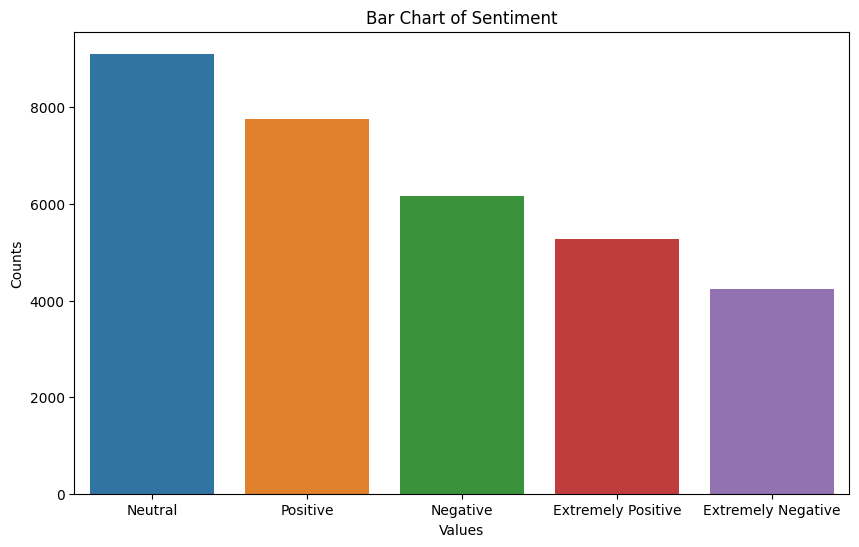

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x=values, y=counts)
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Bar Chart of Sentiment')
plt.show()

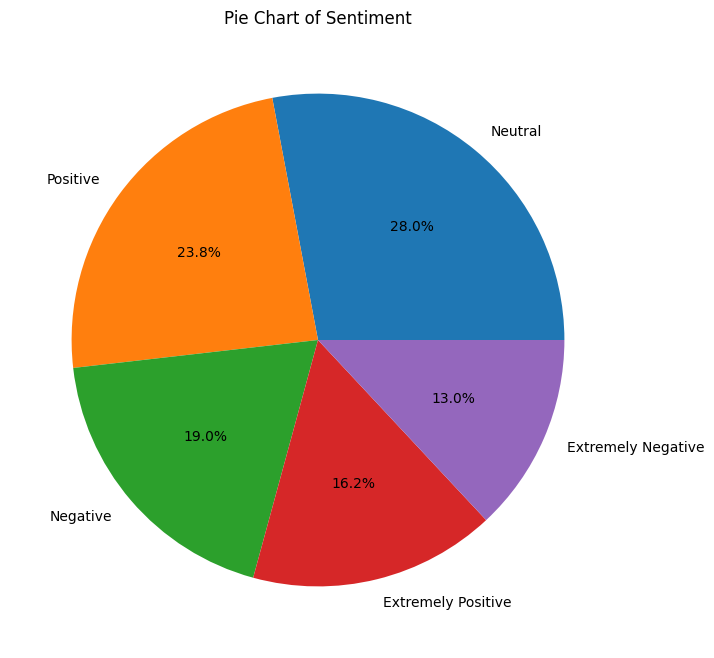

In [16]:
plt.figure(figsize=(8, 8))  # تحديد عرض وارتفاع التصوير بالبوصة
plt.pie(counts, labels=values, autopct='%1.1f%%')
plt.title('Pie Chart of Sentiment')
plt.show()

### We find here that the Neutral ratio is the most among all and the least is Extremely Negative 

In [13]:
dates = df1['TweetAt'].unique()
values1 = df1['TweetAt'].value_counts()

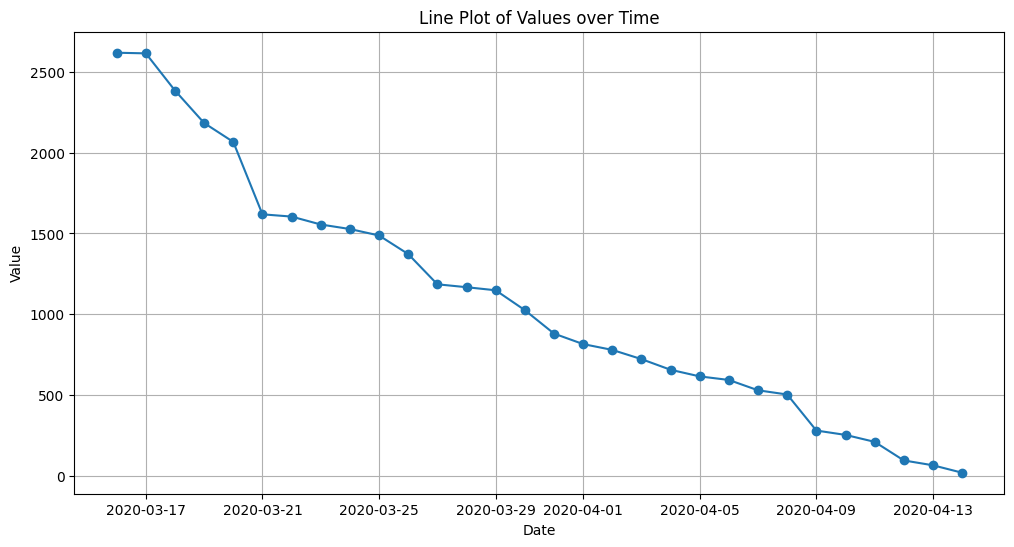

In [16]:
dates = pd.to_datetime(dates)

# إنشاء مخطط خطي
plt.figure(figsize=(12, 6))
plt.plot(dates, values1, marker='o')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Plot of Values over Time')
plt.grid(True)
plt.show()


### This chart shows us that tweets related to Covid-19 were high in the beginning, but as we got used to it, the number of tweets decreased.


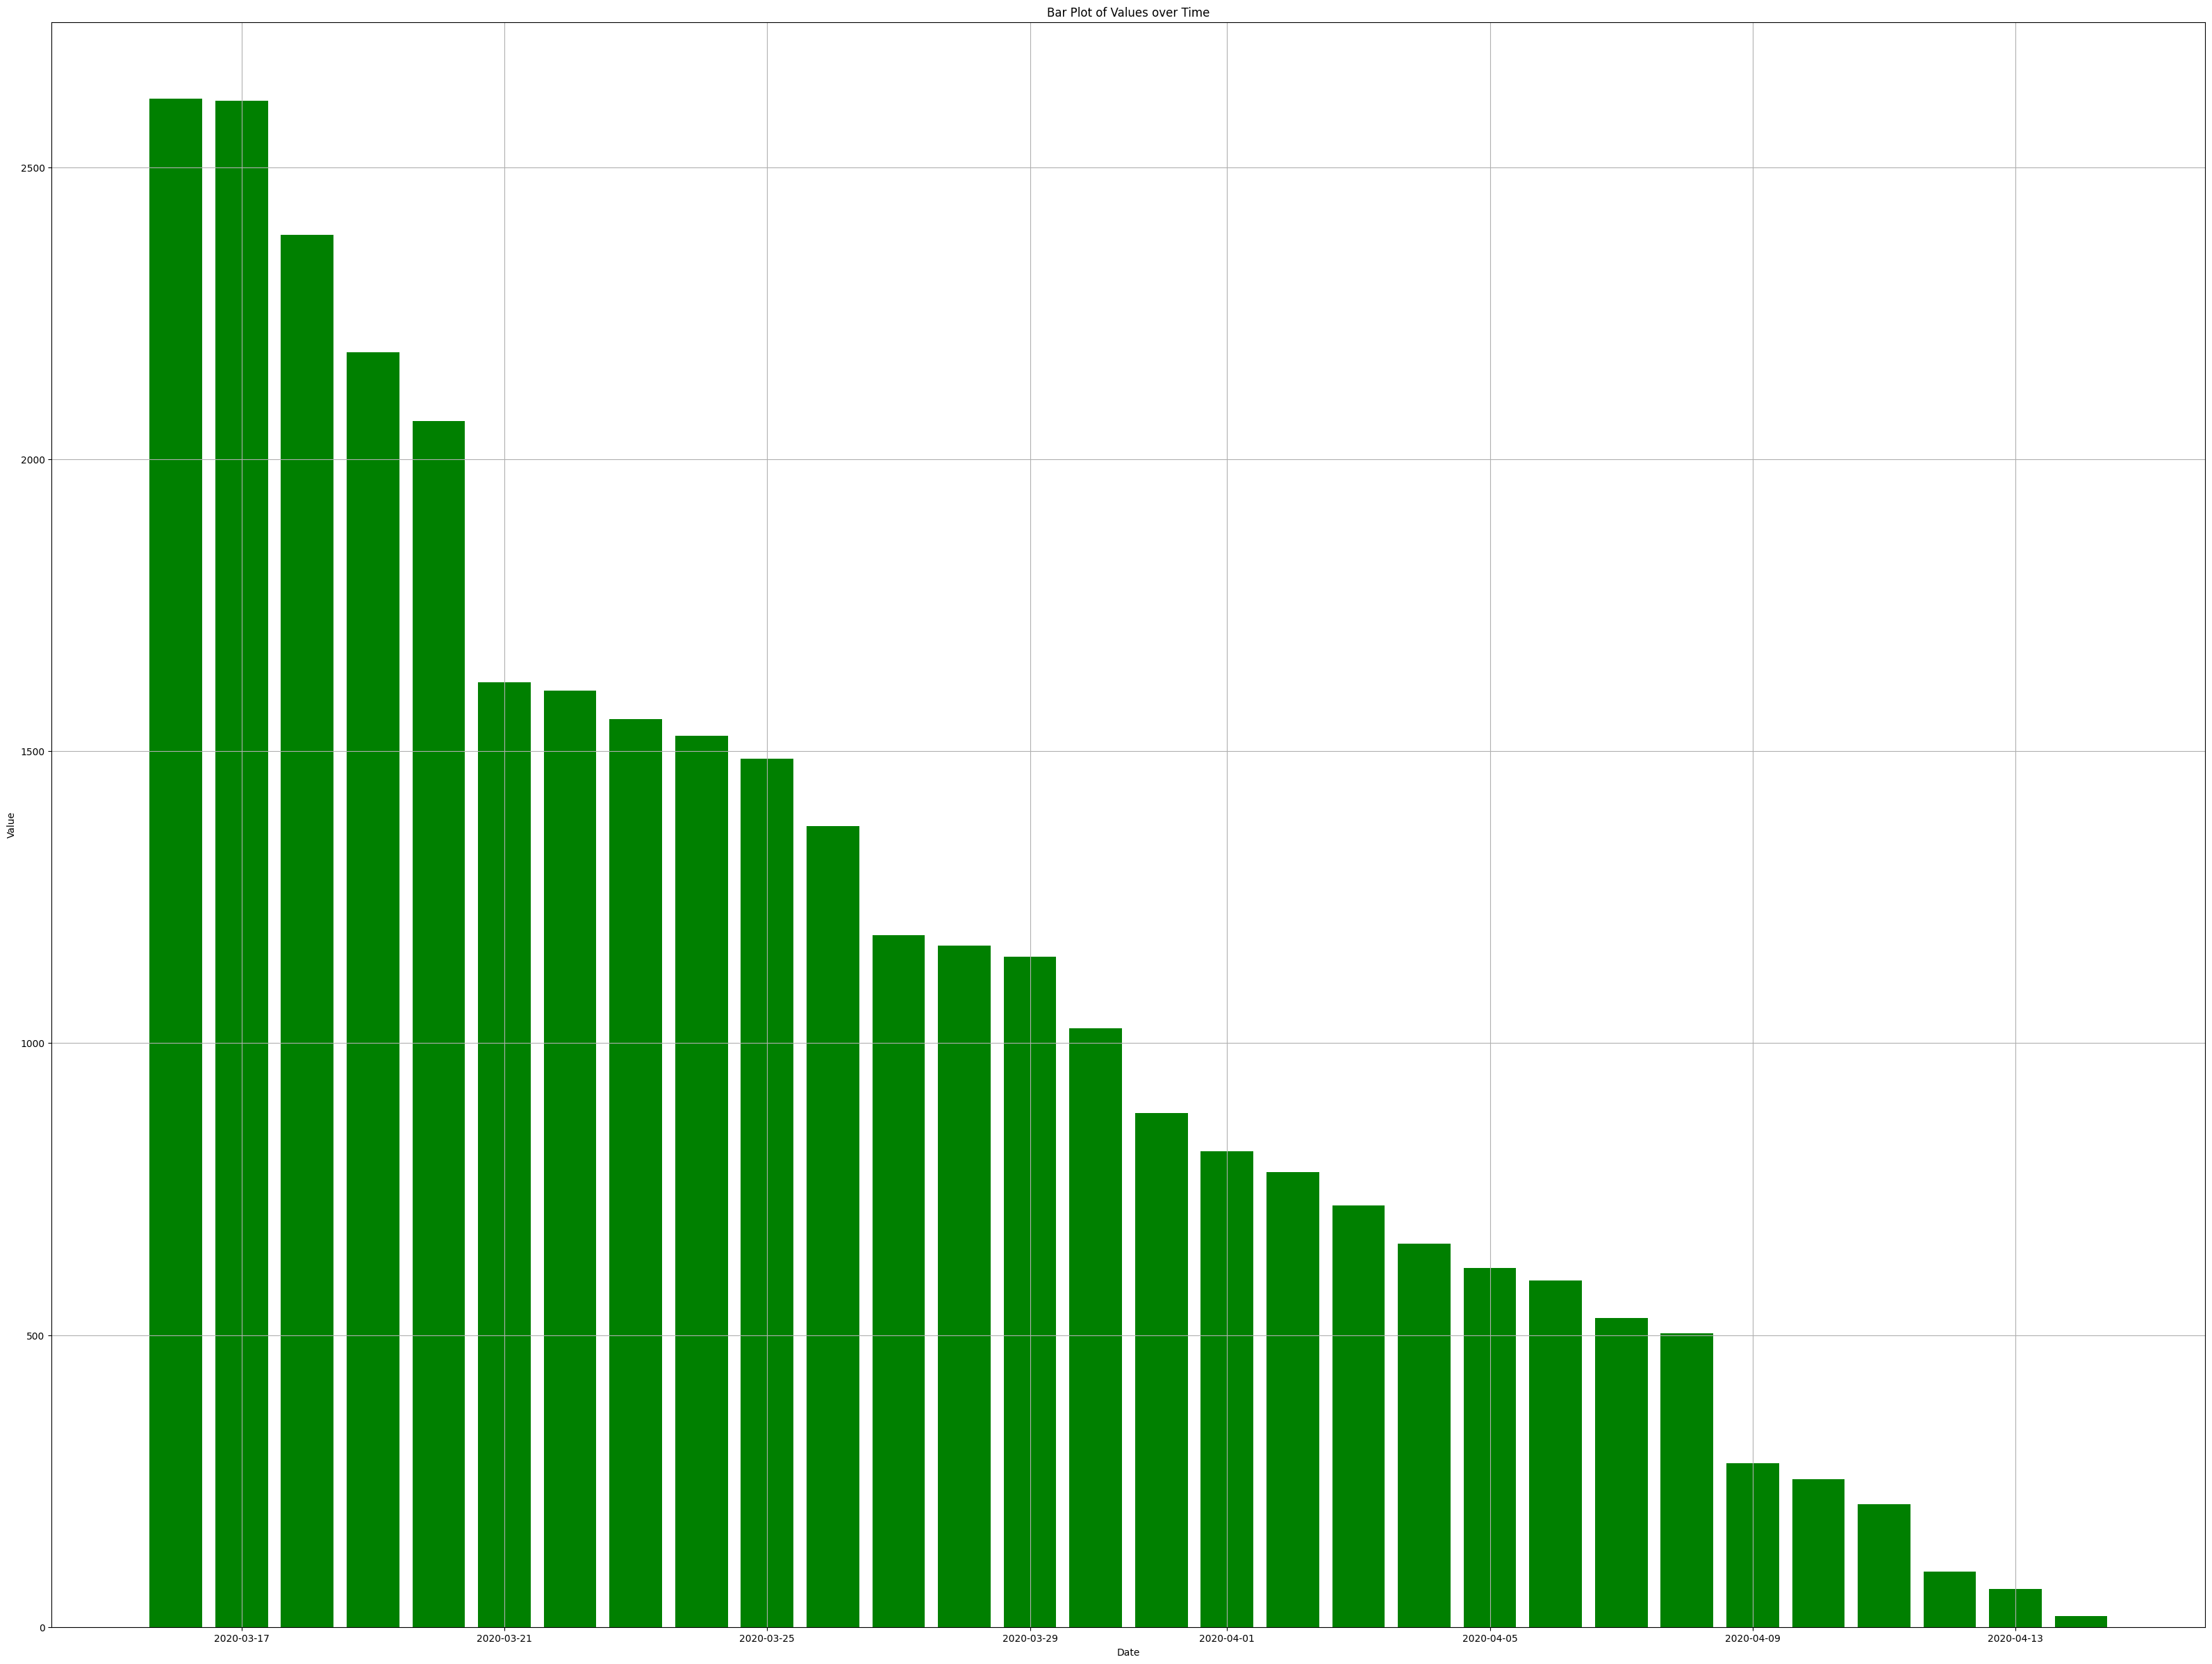

In [19]:
# إنشاء مخطط عمودي
plt.figure(figsize=(40, 30))
plt.bar(dates, values1, color='green')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Bar Plot of Values over Time')
plt.grid(True)
plt.show()

### Here the number for each day is explained in detail



In [17]:
#In searching the Places column, we find that we have 1717 different places
#في البحث في عامود الاماكن نجد ان لدينا 1717 مكان مختلف 
df.Location.value_counts()

Location
United States              75
London, England            48
Washington, DC             38
New York, NY               34
Los Angeles, CA            33
                           ..
India, Belgium.             1
Boston, Montréal, Paris     1
Annapolis, MD               1
here and there              1
Haverford, PA               1
Name: count, Length: 1717, dtype: int64

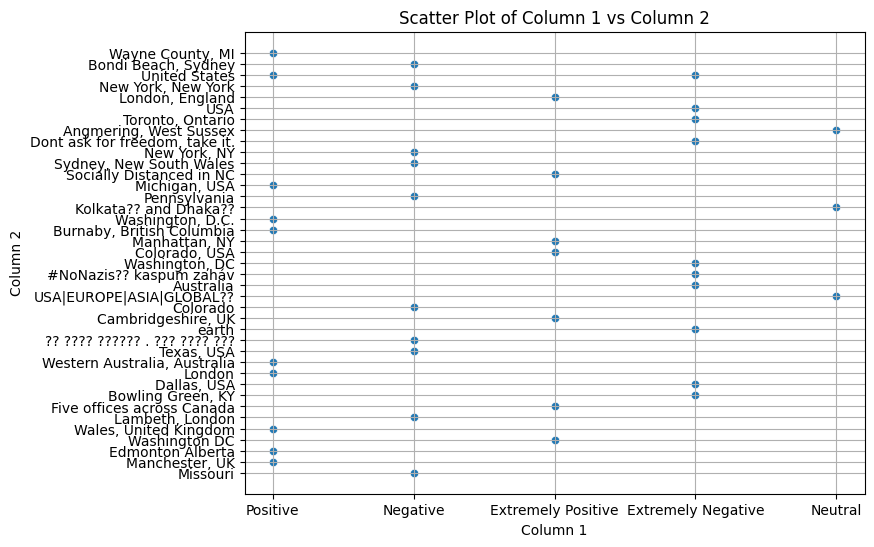

In [18]:

# إنشاء مخطط الانتشار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment', y='Location', data=df[20:60])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.grid(True)
plt.show()


### With the creation of the chart, we find that there are invalid and almost imaginary values ​​that must be eliminated
### مع انشاء المخطط نجد ان هناك قيم غير صالحه وشبه وهمية يجب التخلص منها 


In [19]:
print(df.columns)

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [20]:
# First, we will convert the entire column to text because there are some values ​​in the middle that are not text
# اولا سنقوم بتحويل العامود بالكامل الي نص لان هناك بعض القيم في الوسط ليست نصوص
df['Location'] = df['Location'].astype(str)

In [21]:
import re

# قراءة البيانات إلى DataFrame
# على سبيل المثال، لنفترض أن لديك DataFrame يسمى df والعمود الذي تريد تنظيفه هو "Location"

# دالة لإزالة الرموز غير المرغوب فيها باستخدام مكتبة re
def remove_special_characters(text):
    # تعريف التعبير العادي لإزالة الرموز
    pattern = r'[^a-zA-Z\s]'   # يتم الاحتفاظ بالأحرف الأبجدية الإنجليزية، الأرقام، والفراغات
 
    # استخدام الدالة sub() لإزالة الرموز باستخدام التعبير العادي
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# تطبيق الدالة على عمود "Location"
df['Location'] = df['Location'].apply(remove_special_characters)


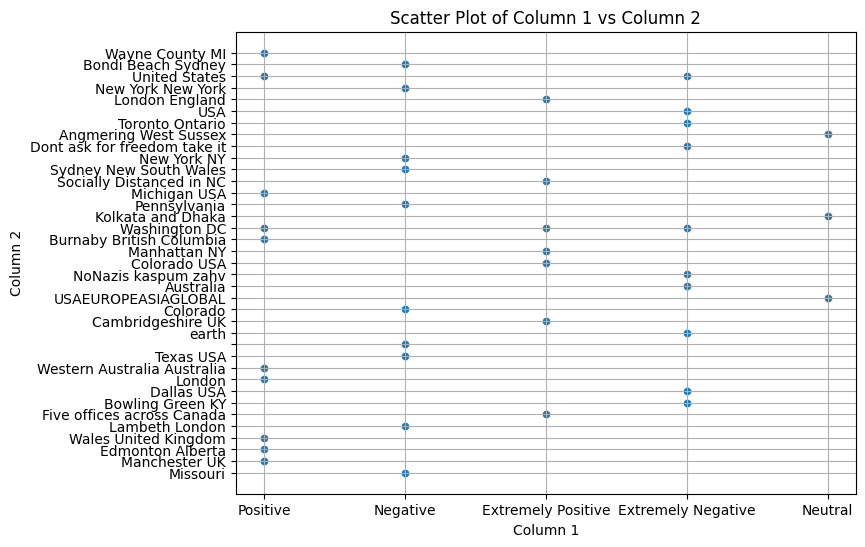

In [82]:

# إنشاء مخطط الانتشار
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sentiment', y='Location', data=df[20:60])
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Scatter Plot of Column 1 vs Column 2')
plt.grid(True)
plt.show()

### The data was set and the visualization was successful


### Now, to make it easier to visualize the Sentiment column better, we will convert it to numbers
### الان ليسهل تصور عامود Sentiment بشكل افضل سنقوم بتحويله الي ارقام

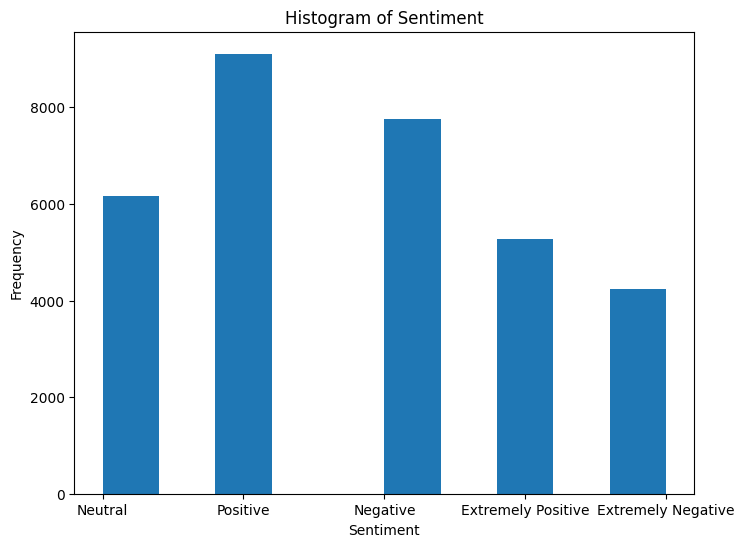

In [26]:
plt.figure(figsize=(8, 6))
plt.hist(df1['Sentiment'], bins=10)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Sentiment')
plt.show()

In [22]:
# قائمة بالتطابق بين القيم النصية والقيم العددية المقابلة
mapping = {
    'Extremely Negative': -2,
    'Negative': -1,
    'Neutral': 0,
    'Positive': 1,
    'Extremely Positive': 2
}

# استخدام دالة map() لتحويل القيم النصية إلى القيم العددية
df1['Sentiment_1'] = df1['Sentiment'].map(mapping)

In [23]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_1
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1
...,...,...,...,...,...,...,...
41147,44946,89898,"Brooklyn, NY",14-04-2020,YÂall really shitting that much more at home?...,Negative,-1
41149,44948,89900,"Toronto, Ontario",14-04-2020,Still shocked by the number of #Toronto superm...,Negative,-1
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,1
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0


In [24]:
df1['Location'] = df1['Location'].apply(remove_special_characters)

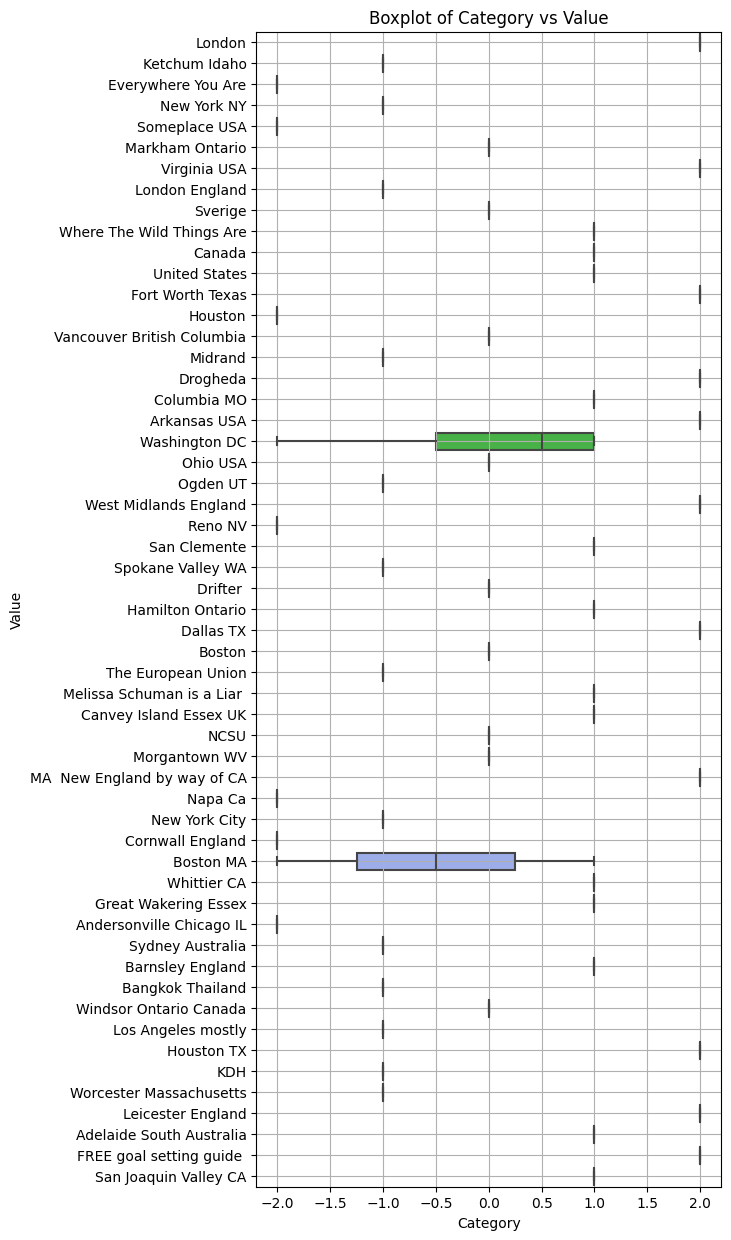

In [25]:
# إنشاء مخطط الصندوق والشارب
plt.figure(figsize=(6, 15))
sns.boxplot(x='Sentiment_1', y='Location', data=df1[20:80])
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Boxplot of Category vs Value')
plt.grid(True)
plt.show()

In [26]:
print(len(df1['Sentiment']), len(df1['Location']))

32567 32567


In [27]:
# التحقق من القيم المفقودة في العمود
missing_values = df1['Location'].isnull()

# استخدام العملية ~ لتحديد الصفوف التي لا تحتوي على قيم مفقودة
valid_values = ~missing_values

# حذف الصفوف التي تحتوي على القيم الجغرافية
df1 = df1[valid_values] 


In [28]:
# تحويل القيم في عمود البيانات إلى نصوص
df1['Location'] = df1['Location'].astype(str)

# استخدام تعبير الاسترجاع النصي لتحديد الصفوف التي تحتوي على القيم الجغرافية
geographic_values = df1['Location'].str.contains(r'\b\d+\.\d+,-\d+\.\d+\b', regex=True)

# حذف الصفوف التي تحتوي على القيم الجغرافية
df1 = df1[~geographic_values]


In [29]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_1
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1
5,3804,48756,T,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1
6,3805,48757,,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1
...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,-1
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,-1
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,1
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0


In [30]:
df1['Sentiment'].value_counts()

Sentiment
Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: count, dtype: int64

In [31]:
import re

# قراءة البيانات إلى DataFrame
# على سبيل المثال، لنفترض أن لديك DataFrame يسمى df والعمود الذي تريد تنظيفه هو "Location"

# دالة لإزالة الرموز غير المرغوب فيها باستخدام مكتبة re
def remove_special_characters(text):
    # تعريف التعبير العادي لإزالة الرموز
    pattern = r'[^a-zA-Z\s]'   # يتم الاحتفاظ بالأحرف الأبجدية الإنجليزية، الأرقام، والفراغات
     
    # استخدام الدالة sub() لإزالة الرموز باستخدام التعبير العادي
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

# تطبيق الدالة على عمود "Location"
df['Location'] = df['Location'].apply(remove_special_characters)

In [32]:

# تحميل قائمة الكلمات الوقفية
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

# قائمة لتخزين النصوص المنظفة
cleaned_texts = []

# تنظيف النصوص
for text in df1['OriginalTweet']:
    # تحويل النص إلى حروف صغيرة
    text = text.lower()
    
    # إزالة الرموز الغير مفيدة
    text = text.translate(str.maketrans('', '', string.punctuation + '@#$'))
    # إزالة الروابط
    text = re.sub(r'http\S+', '', text)
    # تقسيم النص إلى كلمات
    words = word_tokenize(text)
    
    # إزالة الكلمات الوقفية
    words = [word for word in words if word not in stop_words]
    
    # إعادة تجميع الكلمات لتكوين النص النظيف
    cleaned_text = ' '.join(words)
    
    # إضافة النص النظيف إلى القائمة
    cleaned_texts.append(cleaned_text)

# إنشاء DataFrame جديد يحتوي على النصوص المنظفة

df1['OriginalTweet_cleaned'] = cleaned_texts

# طباعة النتائج أو حفظها في ملف CSV
print(df1.head())

# لحفظ البيانات المنظفة في ملف CSV
# cleaned_df.to_csv('مسار_الملف_المنظف.csv', index=False)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
5      3804       48756         T   16-03-2020   
6      3805       48757             16-03-2020   

                                       OriginalTweet Sentiment  Sentiment_1  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral            0   
1  advice Talk to your neighbours family to excha...  Positive            1   
2  Coronavirus Australia: Woolworths to give elde...  Positive            1   
5  As news of the regionÂs first confirmed COVID...  Positive            1   
6  Cashier at grocery store was sharing his insig...  Positive  

In [33]:
df1

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_1,OriginalTweet_cleaned
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,menyrbie philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1,advice talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths give elderly ...
5,3804,48756,T,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1,news regionâs first confirmed covid19 case ca...
6,3805,48757,,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1,cashier grocery store sharing insights covid19...
...,...,...,...,...,...,...,...,...
41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,-1,yâall really shitting much home covid19 coron...
41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,-1,still shocked number toronto supermarket emplo...
41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,1,never weâd situation amp world going supermar...
41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0,airline pilots offering stock supermarket shel...


In [34]:
#32567
#32567
#32567
df1 = df1.reset_index()
df1

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_1,OriginalTweet_cleaned
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,menyrbie philgahan chrisitv
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1,advice talk neighbours family exchange phone n...
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths give elderly ...
3,5,3804,48756,T,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1,news regionâs first confirmed covid19 case ca...
4,6,3805,48757,,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1,cashier grocery store sharing insights covid19...
...,...,...,...,...,...,...,...,...,...
32562,41147,44946,89898,Brooklyn NY,14-04-2020,YÂall really shitting that much more at home?...,Negative,-1,yâall really shitting much home covid19 coron...
32563,41149,44948,89900,Toronto Ontario,14-04-2020,Still shocked by the number of #Toronto superm...,Negative,-1,still shocked number toronto supermarket emplo...
32564,41150,44949,89901,OHIO,14-04-2020,I never that weÂd be in a situation &amp; wor...,Positive,1,never weâd situation amp world going supermar...
32565,41152,44951,89903,Wellington City New Zealand,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,0,airline pilots offering stock supermarket shel...


In [35]:
for i in range(5,25):
    print(f"{i+1}: {df1['OriginalTweet_cleaned'][i]} -> {df1['Sentiment'][i]}")

6: supermarket today didnt buy toilet paper rebel toiletpapercrisis covid19 -> Neutral
7: due covid19 retail store classroom atlanta open walkin business classes next two weeks beginning monday march 16 continue process online phone orders normal thank understanding -> Positive
8: corona preventionwe stop buy things cash use online payment methods corona spread notes also prefer online shopping home time fight covid 19 govindia indiafightscorona -> Negative
9: month hasnt crowding supermarkets restaurants however reducing hours closing malls means everyone using entrance dependent single supermarket manila lockdown covid2019 philippines -> Neutral
10: due covid19 situation increased demand food products wait time may longer online orders particularly beef share freezer packs thank patience time -> Extremely Positive
11: horningsea caring community letâs look less capable village ensure stay healthy bringing shopping doors help online shopping self isolation symptoms exposed somebody -

In [37]:
def choosingcol(df1):
    new_df=df1.loc[:, ['OriginalTweet_cleaned', 'Sentiment']]
    return new_df

#------------------------------------------------------------------
def reducing_sentiment(df1):
    df1 = df1.loc[df1['Sentiment'] != 'Neutral']

    # replace extremely positive and extremely negative with positive and negative, respectively
    df1['Sentiment'] = df1['Sentiment'].replace({'Extremely Positive': 'Positive', 'Extremely Negative': 'Negative'})
    
    return df1
#-----------------------------------------------------------------
def converting_tonumeric(df):
    sentiment_dict = {'Positive': 1, 'Negative': 0}
    df1['Sentiment'] = df1['Sentiment'].replace(sentiment_dict)
    return df1

In [40]:
# Using functions to make train_set ready 
df1 = choosingcol(df1)
df1 = reducing_sentiment(df1)
df1 = converting_tonumeric(df1)
df1 = df1.reset_index(drop=True)
df1 

,OriginalTweet_cleaned,Sentiment
0,advice talk neighbours family exchange phone n...,1
1,coronavirus australia woolworths give elderly ...,1
2,news regionâs first confirmed covid19 case ca...,1
3,cashier grocery store sharing insights covid19...,1
4,due covid19 retail store classroom atlanta ope...,1
...,...,...
26390,gold prices rose 7year high today due coronavi...,1
26391,yâall really shitting much home covid19 coron...,0
26392,still shocked number toronto supermarket emplo...,0
26393,never weâd situation amp world going supermar...,1


In [41]:
contractions_dict = {
    "ain't": "am not / are not / is not / has not / have not",
    "aren't": "are not",
    "can't": "cannot",
    "could've": "could have",
    "couldn't": "could not",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he had / he would",
    "he'll": "he shall / he will",
    "he's": "he is",
    "I'd": "I had / I would",
    "I'll": "I shall / I will",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had / it would",
    "it'll": "it shall / it will",
    "it's": "it is",
    "let's": "let us",
    "might've": "might have",
    "mightn't": "might not",
    "must've": "must have",
    "mustn't": "must not",
    "shan't": "shall not",
    "she'd": "she had / she would",
    "she'll": "she shall / she will",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "that's": "that is",
    "there's": "there is",
    "they'd": "they had / they would",
    "they'll": "they shall / they will",
    "they're": "they are",
    "they've": "they have",
    "wasn't": "was not",
    "we'd": "we had / we would",
    "we'll": "we shall / we will",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what shall / what will",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "where's": "where is",
    "who'd": "who had / who would",
    "who'll": "who shall / who will",
    "who're": "who are",
    "who's": "who is",
    "who've": "who have",
    "won't": "will not",
    "would've": "would have",
    "wouldn't": "would not",
    "you'd": "you had / you would",
    "you'll": "you shall / you will",
    "you're": "you are",
    "you've": "you have"
}

In [42]:
def cleaning_with_re(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', tweet)

    # remove hashtag (#)
    tweet = re.sub(r'#', '', tweet)
    
    #replaces newline (\n) and carriage return (\r) characters in a tweet with an empty string
    tweet = re.sub(r'[\n\r]', '', tweet)
    
    #replaces the numbers with an empty string
    tweet = re.sub(r'\d+', '', tweet)
    
    return tweet

#----------------------------------------------------------------
def expanding_words(tweet):
    
    words = tweet.split()
    expanded_words = []
    for word in words:
        if word.lower() in contractions_dict:
            expanded_words.extend(contractions_dict[word.lower()].split("/"))
        else:
            expanded_words.append(word)
    return " ".join(expanded_words)

#----------------------------------------------------------------
def tokenizing(tweet):
    
    stopwords_english = stopwords.words('english') 
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    new_tweet = tokenizer.tokenize(tweet)
    
    clean_tweet=[]
    
    for word in new_tweet: # Going through every word in tokens list
        if (word not in stopwords_english and word not in string.punctuation):  # remove punctuation and stopwords
            clean_tweet.append(word)

    return clean_tweet

#----------------------------------------------------------------
def stemming(tweet):
    # Instantiate stemming class
    stemmer = PorterStemmer() 

    # Create an empty list to store the stems
    stemmed_tweets = [] 

    for word in tweet:
        stem_word = stemmer.stem(word)  # stemming word
        stemmed_tweets.append(stem_word)  # append to the list
        
    return stemmed_tweets

In [43]:
def preprocessing(tweet):
    
    tweet=cleaning_with_re(tweet)
    tweet=expanding_words(tweet)
    tweet=tokenizing(tweet)
    tweet=stemming(tweet)
    
    return tweet

In [44]:
def build_freqs(listoftweets, labels):
    
    labelslist = np.squeeze(labels).tolist()
    
    # Start with an empty dictionary and populate it by looping over all tweets and all the words in them
    freqs = {}
    for y, tweet in zip(labels, listoftweets):
        t=preprocessing(tweet)
        for word in t:
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
                
    # Calculate the sum of frequencies for each word
    word_sums = {}
    for (word, y), count in freqs.items():
        if word in word_sums:
            word_sums[word] += count
        else:
            word_sums[word] = count

    # Divide each key of word and class by the sum
    for (word, y), count in freqs.items():
        freqs[(word, y)] /= word_sums[word]
            
    return freqs

#------------------------------------------------------------------
def extract_features(tweet, freqs, preprocessing=preprocessing):
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_list = preprocessing(tweet)
    
    # 2 elements for [ positive, negative] counts
    features = np.zeros(2) 

    # loop through each word in the list of words
    for word in word_list:
        
        # increment the word count for the positive label 1
        features[0] += freqs.get((word, 1.0),0)
            
        # increment the word count for the negative label 0
        features[1] += freqs.get((word, 0),0)
    
    features = features[None, :] 
    assert(features.shape == (1, 2))
    return features

In [45]:
%%time 
word_frequencies=build_freqs(df1['OriginalTweet_cleaned'].tolist(), df1['Sentiment'].tolist())

CPU times: user 33.7 s, sys: 622 ms, total: 34.3 s
Wall time: 34.3 s


In [46]:
X = np.zeros((len(df1['Sentiment']), 2))
for i in range(len(df1['Sentiment'])):
    X[i, :]= extract_features(df1['OriginalTweet_cleaned'][i], word_frequencies)

print(X)
    
# training labels corresponding to X
Y = np.array(df1['Sentiment'])

[[16.70847657 10.29152343]
 [ 6.77410341  5.22589659]
 [15.7732074  11.2267926 ]
 ...
 [ 8.10308971  6.89691029]
 [11.36911519  7.63088481]
 [10.68787459 14.31212541]]


array([1, 1, 1, ..., 0, 1, 0])

In [55]:
# Model 
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # Hidden layer with 4 neurons
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Output layer with logistic regression

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=11, batch_size=32)

Epoch 1/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7073 - loss: 0.7674
Epoch 2/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8643 - loss: 0.3347
Epoch 3/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8760 - loss: 0.3030
Epoch 4/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8833 - loss: 0.2967
Epoch 5/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8839 - loss: 0.2838
Epoch 6/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8865 - loss: 0.2775
Epoch 7/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8872 - loss: 0.2770
Epoch 8/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8885 - loss: 0.2757
Epoch 9/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8872 - loss: 0.2745
Epoch 10/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.2730
Epoch 11/11
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.2695


In [42]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df1.OriginalTweet_cleaned)

# عدد الكلمات الفريدة
num_unique_words = len(tokenizer.word_index)
print("Number of unique words:", num_unique_words)

Number of unique words: 54228


In [44]:
# إضافة عمود جديد يحتوي على طول كل جملة
df1['sentence_length'] = df1['OriginalTweet_cleaned'].apply(lambda x: len(x.split()))

# طباعة أول عشر صفوف للتحقق
df1.head(10)

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Sentiment_1,OriginalTweet_cleaned,sentence_length
0,0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,0,menyrbie philgahan chrisitv,3
1,1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,1,advice talk neighbours family exchange phone n...,27
2,2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,1,coronavirus australia woolworths give elderly ...,12
3,5,3804,48756,T,16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,1,news regionâs first confirmed covid19 case ca...,26
4,6,3805,48757,,16-03-2020,Cashier at grocery store was sharing his insig...,Positive,1,cashier grocery store sharing insights covid19...,15
5,7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,0,supermarket today didnt buy toilet paper rebel...,9
6,8,3807,48759,Atlanta GA USA,16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,1,due covid19 retail store classroom atlanta ope...,25
7,9,3808,48760,BHAVNAGARGUJRAT,16-03-2020,"For corona prevention,we should stop to buy th...",Negative,-1,corona preventionwe stop buy things cash use o...,24
8,10,3809,48761,Makati Manila,16-03-2020,All month there hasn't been crowding in the su...,Neutral,0,month hasnt crowding supermarkets restaurants ...,21
9,11,3810,48762,Pitt Meadows BC Canada,16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive,2,due covid19 situation increased demand food pr...,21


In [47]:
df1.describe()

,index,UserName,ScreenName,Sentiment_1,sentence_length
count,32567.000000,32567.000000,32567.000000,32567.000000,32567.000000
mean,20619.499309,24418.499309,69370.499309,0.104247,18.499033
std,11899.886650,11899.886650,11899.886650,1.294918,6.832319
min,0.000000,3799.000000,48751.000000,-2.000000,0.000000
25%,10203.500000,14002.500000,58954.500000,-1.000000,13.000000
50%,20777.000000,24576.000000,69528.000000,0.000000,19.000000
75%,30948.500000,34747.500000,79699.500000,1.000000,24.000000
max,41156.000000,44955.000000,89907.000000,2.000000,46.000000


In [57]:
vocab_size = 54228  
max_length = 100 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Sentiment'] = le.fit_transform(df1['Sentiment'])

In [ ]:
# تقسيم البيانات إلى مجموعات الاختبار والتدريب
X_train, X_test, y_train, y_test = train_test_split(df1['OriginalTweet_cleaned'], df1['Sentiment'], test_size=0.2, random_state=42)

# مثال على تحويل النص إلى متغيرات قابلة للتحليل
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# بناء وتدريب النموذج
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
model.fit(X_train_vectorized, y_train)

# التنبؤ باستخدام النموذج
predictions = model.predict(X_test_vectorized)

# قياس أداء النموذج
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

In [ ]:
output_dim = len(df1['Sentiment'].unique())  # Assuming 'label' is the column containing class labels
output_dim

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#lb = LabelEncoder()
#df1.Sentiment = lb.fit_transform(df1.Sentiment)

In [ ]:
#x = df1.drop(['index','UserName','Location','TweetAt','OriginalTweet','Sentiment_1','Sentiment','ScreenName'],axis=1)
x = df1['OriginalTweet_cleaned']
y = df1['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x.shape
vocab_size = 10000  
max_length = 100